In [1]:
import pandas as pd

In [2]:
sp = pd.read_csv("C:\\Users\\acer\\Downloads\\50_Startups.csv")

In [3]:
sp.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
sp.State.describe()

count           50
unique           3
top       New York
freq            17
Name: State, dtype: object

In [5]:
states = pd.get_dummies(sp.State)

In [6]:
states = states.drop(states.columns[0],1)

In [7]:
sp = pd.concat([sp,states],axis=1)

In [8]:
sp.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,1
1,162597.70,151377.59,443898.53,California,191792.06,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,1,0
5,131876.90,99814.71,362861.36,New York,156991.12,0,1
6,134615.46,147198.87,127716.82,California,156122.51,0,0
7,130298.13,145530.06,323876.68,Florida,155752.60,1,0
8,120542.52,148718.95,311613.29,New York,152211.77,0,1
9,123334.88,108679.17,304981.62,California,149759.96,0,0


In [9]:
sp = sp.drop('State',1)

In [10]:
sp.head(10)

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0
5,131876.90,99814.71,362861.36,156991.12,0,1
6,134615.46,147198.87,127716.82,156122.51,0,0
7,130298.13,145530.06,323876.68,155752.60,1,0
8,120542.52,148718.95,311613.29,152211.77,0,1
9,123334.88,108679.17,304981.62,149759.96,0,0


# Normialize the Data

In [11]:
def Normalize(data):
    return ((data - data.min())/(data.max()-data.min()))

In [12]:
sp = sp.apply(Normalize)

In [13]:
sp.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,1.000000,0.651744,1.000000,1.000000,0.0,1.0
1,0.983359,0.761972,0.940893,0.997355,0.0,0.0
2,0.927985,0.379579,0.864664,0.993178,1.0,0.0
3,0.873136,0.512998,0.812235,0.947292,0.0,1.0
4,0.859438,0.305328,0.776136,0.853171,1.0,0.0


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

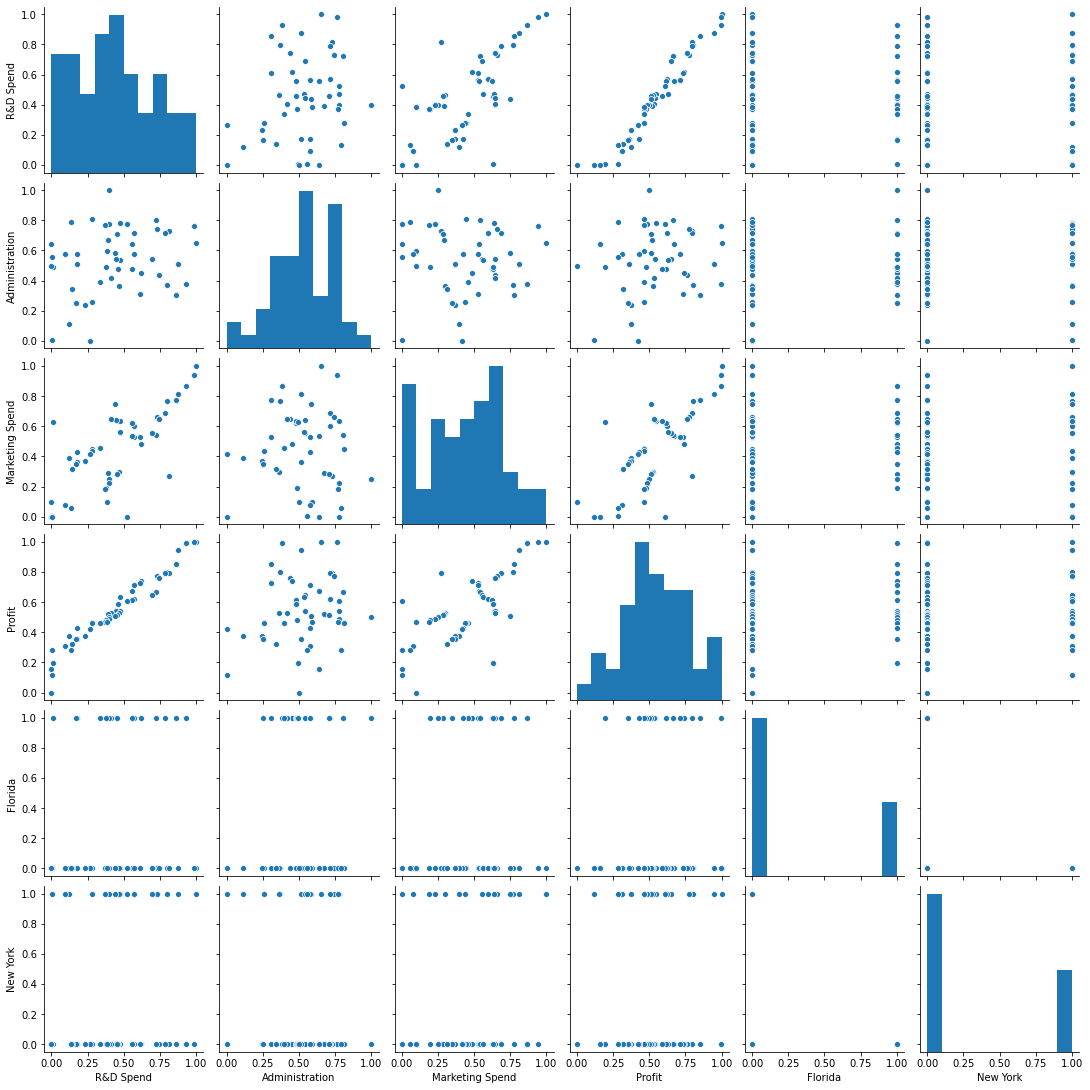

In [15]:
sns.pairplot(data = sp)

plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
xTrain, xTest, yTrain, yTest = train_test_split(sp[['R&D Spend','Administration','Marketing Spend','Florida','New York']
                                                  ],sp.Profit,test_size=0.2)

In [18]:
import statsmodels.api as sm 

In [19]:
xTrain = sm.add_constant(xTrain)

c:\users\acer\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [20]:
yPred = sm.OLS(yTrain,xTrain).fit()

In [21]:
print(yPred.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     161.4
Date:                Sat, 21 Mar 2020   Prob (F-statistic):           1.14e-22
Time:                        20:45:49   Log-Likelihood:                 70.689
No. Observations:                  40   AIC:                            -129.4
Df Residuals:                      34   BIC:                            -119.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2084      0.027     

# Calculating the VIF

In [22]:
def vif_cal(input_data, dependent_col):
    
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    
    xvar_names=x_vars.columns
    
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
        
        
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [23]:
# Calculating Vif value|
vif_cal(input_data=sp, dependent_col="Profit")

,Var,Vif
0,R&D Spend,8.83
2,Marketing Spend,7.95
1,Administration,3.95
3,Florida,1.95
4,New York,1.83


In [24]:
xTrain = xTrain.drop('Marketing Spend',1)

In [25]:
xTrain.head()

,const,R&D Spend,Administration,Florida,New York
25,1.0,0.391080,0.671958,0.0,0.0
22,1.0,0.447505,0.544293,1.0,0.0
6,1.0,0.814128,0.730161,0.0,0.0
20,1.0,0.461169,0.476424,0.0,0.0
10,1.0,0.616351,0.451506,1.0,0.0


In [26]:
yPred = sm.OLS(yTrain,xTrain).fit()

In [27]:
print(yPred.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     188.7
Date:                Sat, 21 Mar 2020   Prob (F-statistic):           3.66e-23
Time:                        20:45:50   Log-Likelihood:                 68.847
No. Observations:                  40   AIC:                            -127.7
Df Residuals:                      35   BIC:                            -119.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2325      0.024      9.

In [28]:
vif_cal(input_data=sp.drop('Marketing Spend',1), dependent_col="Profit")

,Var,Vif
1,Administration,3.95
0,R&D Spend,3.65
2,Florida,1.78
3,New York,1.78


In [29]:
xTrain = xTrain.drop('New York',1)

In [30]:
yPred = sm.OLS(yTrain,xTrain).fit()

In [31]:
print(yPred.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     257.2
Date:                Sat, 21 Mar 2020   Prob (F-statistic):           2.31e-24
Time:                        20:45:50   Log-Likelihood:                 68.731
No. Observations:                  40   AIC:                            -129.5
Df Residuals:                      36   BIC:                            -122.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2273      0.021     10.

In [32]:
xTrain = xTrain.drop('Florida',1)

In [33]:
yPred = sm.OLS(yTrain,xTrain).fit()

In [34]:
print(yPred.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     396.0
Date:                Sat, 21 Mar 2020   Prob (F-statistic):           1.04e-25
Time:                        20:45:51   Log-Likelihood:                 68.708
No. Observations:                  40   AIC:                            -131.4
Df Residuals:                      37   BIC:                            -126.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2281      0.021     10.

In [35]:
vif_cal(input_data=sp.drop(['Marketing Spend','Florida','New York'],1), dependent_col="Profit")

,Var,Vif
0,R&D Spend,3.36
1,Administration,3.36


In [36]:
xTrain = xTrain.drop('Administration',1)

In [37]:
yPred = sm.OLS(yTrain,xTrain).fit()

In [38]:
print(yPred.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     785.5
Date:                Sat, 21 Mar 2020   Prob (F-statistic):           5.46e-27
Time:                        20:45:51   Log-Likelihood:                 68.041
No. Observations:                  40   AIC:                            -132.1
Df Residuals:                      38   BIC:                            -128.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2106      0.014     15.329      0.0

In [39]:
print(xTrain)

    const  R&D Spend
25    1.0   0.391080
22    1.0   0.447505
6     1.0   0.814128
20    1.0   0.461169
10    1.0   0.616351
5     1.0   0.797566
38    1.0   0.122345
8     1.0   0.729018
11    1.0   0.608845
28    1.0   0.399467
34    1.0   0.280776
42    1.0   0.142976
47    1.0   0.000000
45    1.0   0.006049
31    1.0   0.369741
32    1.0   0.383485
14    1.0   0.725394
16    1.0   0.471808
29    1.0   0.396769
26    1.0   0.455574
33    1.0   0.335617
2     1.0   0.927985
18    1.0   0.554881
21    1.0   0.474084
48    1.0   0.003278
44    1.0   0.134127
46    1.0   0.007956
35    1.0   0.278284
41    1.0   0.168691
9     1.0   0.745906
23    1.0   0.408424
13    1.0   0.556352
19    1.0   0.522650
39    1.0   0.233194
24    1.0   0.465947
12    1.0   0.567670
36    1.0   0.173353
1     1.0   0.983359
7     1.0   0.788018
43    1.0   0.093776


In [40]:
x = np.array([sp['R&D Spend']]).reshape(-1,1)
y= np.array([sp['Profit']]).reshape(-1,1)

In [41]:
xTrain, xTest ,yTrain,yTest = train_test_split(x,y, test_size=0.2)

In [42]:
lr = LinearRegression()

In [43]:
rg = lr.fit(xTrain,yTrain)

In [44]:
print(rg.intercept_)
print(rg.coef_)

[0.19676896]
[[0.7920954]]


In [45]:
yPred = rg.predict(yTest)

In [46]:
from sklearn.metrics import mean_squared_error,r2_score

In [47]:
mse = mean_squared_error(yTest,yPred)
r2 = r2_score(yTest,yPred)

In [48]:
print(mse)
print(r2)

0.008689700340078646
0.7781726761533051


In [49]:
data = pd.DataFrame({'Actual':yTest.flatten(),'Predicted':yPred.flatten()})

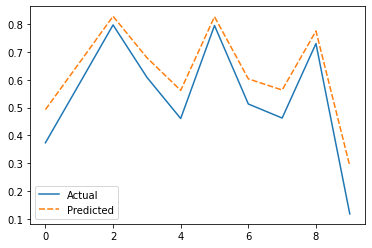

In [50]:
sns.lineplot(data =data)
plt.show()